# Multiple Gravity Assist trajectories
## Objectives

This example demonstrates how **Multiple Gravity Assist (MGA)** transfer trajectories can be simulated. Three types of transfers are analyzed:
* High-thrust transfer with unpowered legs
* High-thrust transfer with deep space maneuvers (DSMs) and manually-created legs and nodes
* Low-thrust transfer with hodographic shaping

 
In addition, this example show how the results, such as partial $\Delta V$'s, total $\Delta V$ and time of flight
values can be retrieved from the transfer object.

A complete guide on transfer trajectory design is given on [this page](https://docs.tudat.space/en/latest/_src_user_guide/prelim_mission_design/mga_transfer.html) of tudat user documentation.

## MGA Transfer With Unpowered Legs

## Import statements

The required import statements are made here, at the very beginning.

Some standard modules are first loaded: numpy and matplotlib.pyplot.

Then, the different modules of tudatpy that will be used are imported.

In [1]:
# Load standard modules
import numpy as np
import matplotlib.pyplot as plt

# Load tudatpy modules
from tudatpy.trajectory_design import transfer_trajectory, shape_based_thrust
from tudatpy.numerical_simulation import environment_setup
from tudatpy.util import result2array
from tudatpy import constants

First, let's explore an MGA transfer trajectory with no thrust applied during the transfer legs. In this case, the impulsive $\Delta V$ maneuvers are only applied during the gravity assists.

### Setup and inputs

A simplified system of bodies suffices for this application, with the Sun as central body. The planets that are visited for a gravity assist are defined in the list `transfer_body_order`. The first body in the list is the departure body and the last one is the arrival body.

The departure and arrival orbit can be specified, but they are not mandatory. If not specified, the departure and arrival planets are selected to be swing-by nodes.
Departures and arrivals at the edge of the Sphere Of Influence (SOI) of a node can be done by specifying eccentricity $e=0$ and semi-major axis $a=\infty$.

In this example, the spacecraft departs from the edge of Earth’s SOI and is inserted into a highly elliptical orbit around Saturn.

In [2]:
# Create a system of simplified bodies (create all main solar system bodies with their simplest models)
bodies = environment_setup.create_simplified_system_of_bodies()
central_body = 'Sun'

# Define the order of bodies (nodes) for gravity assists
transfer_body_order = ['Earth', 'Venus', 'Venus', 'Earth',  'Jupiter',  'Saturn']

# Define the departure and insertion orbits
departure_semi_major_axis = np.inf
departure_eccentricity = 0.

arrival_semi_major_axis = 1.0895e8 / 0.02
arrival_eccentricity = 0.98

### Create transfer settings and transfer object

The specified inputs can not be used directly, but they have to be translated to distinct settings, relating to either the nodes (departure, gravity assist, and arrival planets) or legs (trajectories in between planets). The fact that unpowered legs are used is indicated by the creation of unpowered and unperturbed leg settings.
These settings are, in turn, used to create the transfer trajectory object.

In [3]:
# Define the trajectory settings for both the legs and at the nodes
transfer_leg_settings, transfer_node_settings = transfer_trajectory.mga_settings_unpowered_unperturbed_legs(
    transfer_body_order,
    departure_orbit=(departure_semi_major_axis, departure_eccentricity),
    arrival_orbit=(arrival_semi_major_axis, arrival_eccentricity))

# Create the transfer calculation object
transfer_trajectory_object = transfer_trajectory.create_transfer_trajectory(
    bodies,
    transfer_leg_settings,
    transfer_node_settings,
    transfer_body_order,
    central_body)

### Define transfer parameters

Next, it is necessary to specify the parameters which define the transfer. The advantage of having a transfer trajectory object is that it allows analyzing many different sets of transfer parameters using the same transfer trajectory object.
The definition of the parameters that need to be specified for this transfer can be printed using the `transfer_trajectory.print_parameter_definitions()` function.

In [4]:
# Print transfer parameter definitions
print("Transfer parameter definitions:")
transfer_trajectory.print_parameter_definitions(transfer_leg_settings, transfer_node_settings)

Transfer parameter definitions:
Parameter 0: Node time 0
Parameter 1: Node time 1
Parameter 2: Node time 2
Parameter 3: Node time 3
Parameter 4: Node time 4
Parameter 5: Node time 5



For this transfer with unpowered legs, the transfer parameters only constitute the times at which the powered gravity assists are executed, i.e. at the nodes. 
This type of legs does not require any node free parameters or leg free parameters to be specified. Thus, they are defined as lists containing empty arrays.

In [5]:
# Define times at each node
julian_day = constants.JULIAN_DAY
node_times = list( )
node_times.append( ( -789.8117 - 0.5 ) * julian_day )
node_times.append( node_times[ 0 ] + 158.302027105278 * julian_day )
node_times.append( node_times[ 1 ] + 449.385873819743 * julian_day )
node_times.append( node_times[ 2 ] + 54.7489684339665 * julian_day )
node_times.append( node_times[ 3 ] + 1024.36205846918 * julian_day )
node_times.append( node_times[ 4 ] + 4552.30796805542 * julian_day )

# Define free parameters per leg (for now: none)
leg_free_parameters = list( )
for i in transfer_leg_settings:
    leg_free_parameters.append( np.zeros(0))
    
# Define free parameters per node (for now: none)
node_free_parameters = list( )
for i in transfer_node_settings:
    node_free_parameters.append( np.zeros(0))

### Evaluate transfer

The transfer parameters are now used to evaluate the transfer trajectory, which means that the semi-analytical methods used to determine the $\Delta V$ of each leg are now applied.

In [6]:
# Evaluate the transfer with given parameters
transfer_trajectory_object.evaluate( node_times, leg_free_parameters, node_free_parameters )

### Extract results and plot trajectory
Last but not least, with the transfer trajectory computed, we can now analyse it.

#### Print results
Having evaluated the transfer trajectory, it is possible to extract various transfer characteristics, such as the $\Delta V$ and time of flight.

In [7]:
# Print the total DeltaV and time of Flight required for the MGA
print('Total Delta V of %.3f m/s and total Time of flight of %.3f days\n' % \
    (transfer_trajectory_object.delta_v, transfer_trajectory_object.time_of_flight / julian_day))

# Print the DeltaV required during each leg
print('Delta V per leg: ')
for i in range(len(transfer_body_order)-1):
    print(" - between %s and %s: %.3f m/s" % \
        (transfer_body_order[i], transfer_body_order[i+1], transfer_trajectory_object.delta_v_per_leg[i]))
print()

# Print the DeltaV required at each node
print('Delta V per node : ')
for i in range(len(transfer_body_order)):
    print(" - at %s: %.3f m/s" % \
        (transfer_body_order[i], transfer_trajectory_object.delta_v_per_node[i]))

Total Delta V of 4930.633 m/s and total Time of flight of 6239.107 days

Delta V per leg: 
 - between Earth and Venus: 0.000 m/s
 - between Venus and Venus: 0.000 m/s
 - between Venus and Earth: 0.000 m/s
 - between Earth and Jupiter: 0.000 m/s
 - between Jupiter and Saturn: 0.000 m/s

Delta V per node : 
 - at Earth: 2754.635 m/s
 - at Venus: 1090.659 m/s
 - at Venus: 615.765 m/s
 - at Earth: 0.009 m/s
 - at Jupiter: 0.000 m/s
 - at Saturn: 469.565 m/s


#### Plot the transfer
The state throughout the transfer can be retrieved from the transfer trajectory object, here at 500 instances per leg, to visualize the transfer.

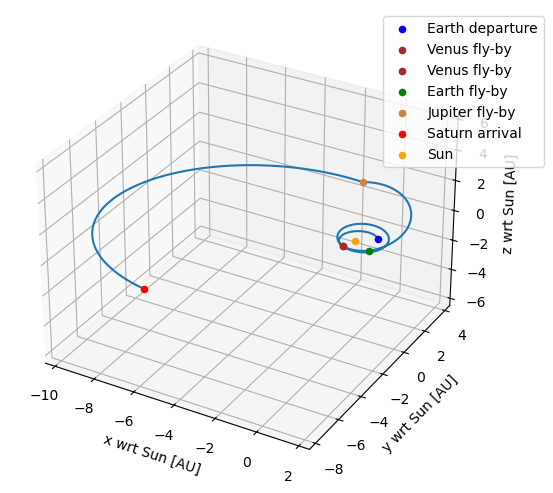

In [8]:
# Extract the state history
state_history = transfer_trajectory_object.states_along_trajectory(500)
fly_by_states = np.array([state_history[node_times[i]] for i in range(len(node_times))])
state_history = result2array(state_history)
au = 1.5e11

# Plot the transfer
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
# Plot the trajectory from the state history
ax.plot(state_history[:, 1] / au, state_history[:, 2] / au, state_history[:, 3] / au)
# Plot the position of the nodes
ax.scatter(fly_by_states[0, 0] / au, fly_by_states[0, 1] / au, fly_by_states[0, 2] / au, color='blue', label='Earth departure')
ax.scatter(fly_by_states[1, 0] / au, fly_by_states[1, 1] / au, fly_by_states[1, 2] / au, color='brown', label='Venus fly-by')
ax.scatter(fly_by_states[2, 0] / au, fly_by_states[2, 1] / au, fly_by_states[2, 2] / au, color='brown', label='Venus fly-by')
ax.scatter(fly_by_states[3, 0] / au, fly_by_states[3, 1] / au, fly_by_states[3, 2] / au, color='green', label='Earth fly-by')
ax.scatter(fly_by_states[4, 0] / au, fly_by_states[4, 1] / au, fly_by_states[4, 2] / au, color='peru', label='Jupiter fly-by')
ax.scatter(fly_by_states[5, 0] / au, fly_by_states[5, 1] / au, fly_by_states[5, 2] / au, color='red', label='Saturn arrival')
# Plot the position of the Sun
ax.scatter([0], [0], [0], color='orange', label='Sun')
# Add axis labels and limits
ax.set_xlabel('x wrt Sun [AU]')
ax.set_ylabel('y wrt Sun [AU]')
ax.set_zlabel('z wrt Sun [AU]')
ax.set_xlim([-10.5, 2.5])
ax.set_ylim([-8.5, 4.5])
ax.set_zlim([-6.5, 6.5])
# Put legend on the right
ax.legend(bbox_to_anchor=[1.15, 1])
plt.tight_layout()
plt.show()

## MGA transfer with DSMs and manually-created settings

This next part of the example now makes use of DSMs in between the nodes. The general approach is similar to the example without DSMs, with some modifications to the inputs and transfer parameters. Additionally, the manual creation of the nodes and legs settings is here exemplified, instead of using a factory function to get them.

### Setup and inputs
Again, a simplified system of bodies suffices. In this case, a transfer to Mercury is considered with gravity assists at Earth and Venus. As before, the departure and arrival orbits, and the central body (Sun) are also specified: the transfer is considered to start at the edge of Earth's SOI and end at the edge of Mercury's SOI.

In [9]:
# Create simplified bodies
bodies = environment_setup.create_simplified_system_of_bodies()
central_body = 'Sun'

# Define a new order of bodies (nodes)
transfer_body_order = ['Earth', 'Earth', 'Venus', 'Venus',  'Mercury']

# Define the departure and insertion orbits
departure_semi_major_axis = np.inf
departure_eccentricity = 0.0

arrival_semi_major_axis = np.inf
arrival_eccentricity = 0.0

### Create transfer settings and transfer object

Since, in this example, the DSMs are specified using the velocity formulation, one can use the `mga_settings_dsm_velocity_based_legs` factory function to create the nodes and legs settings (option 1 in the code block below). This is the same approach followed in the example without DSMs.

Alternatively, one can create the nodes and legs settings manually (option 2 in the code block below): 

- The legs settings are a list containing the settings of each leg in the transfer. Here, only velocity-based DSM legs are used, therefore the settings of each leg are created by calling the `dsm_velocity_based_leg` factory function (this is repeated for all legs in the transfer). 
- The nodes settings are a list containing the settings of each leg in the transfer. The nodes used in this transfer are a departure node (beginning of the transfer), several swingby nodes, and an arrival node (end of the transfer). Thus, the node settings are created by calling `departure_node` once, calling `swingby_node` four times, and calling `capture_node` once.

Although the manual creation of the nodes and legs settings is a bit more complex than directly calling the `mga_settings_dsm_velocity_based_legs` factory function, it also allows more flexibility in the design of the transfer. For example, with manually-created legs settings, it is possible to create a transfer which mixes high- and low-thrust arcs (this is known as a hybrid-thrust transfer, their study is still a very new research area... perhaps you can contribute to it!).

In [10]:
#########################################################################################################
# Option 1: create the nodes and legs settings using the mga_settings_dsm_velocity_based_legs factory function

# Define the MGA transfer settings

# transfer_leg_settings, transfer_node_settings = transfer_trajectory.mga_settings_dsm_velocity_based_legs(
#     transfer_body_order,
#     departure_orbit=(departure_semi_major_axis, departure_eccentricity),
#     arrival_orbit=(arrival_semi_major_axis, arrival_eccentricity))

#########################################################################################################
# Option 2: create the nodes and legs settings by manually calling the factory functions associated with each leg and node of the transfer

# Manually create the legs settings

# First create an empty list and then append to that the settings of each transfer leg
transfer_leg_settings = []
for i in range(len(transfer_body_order) - 1):
    transfer_leg_settings.append( transfer_trajectory.dsm_velocity_based_leg() )

    
# Manually create the nodes settings

# First create an empty list and then append to that the settings of each transfer node
transfer_node_settings = []

# Initial node: departure_node
transfer_node_settings.append( transfer_trajectory.departure_node(departure_semi_major_axis, departure_eccentricity) )

# Intermediate nodes: swingby_node
for i in range(len(transfer_body_order) - 2):
    transfer_node_settings.append( transfer_trajectory.swingby_node() )
    
# Final node: capture_node
transfer_node_settings.append( transfer_trajectory.capture_node(arrival_semi_major_axis, arrival_eccentricity) )

Having created the nodes and legs settings, either manually or using the factory function, it is then possible to use them to create the transfer trajectory object.

In [11]:
# Create the transfer calculation object
transfer_trajectory_object = transfer_trajectory.create_transfer_trajectory(
    bodies,
    transfer_leg_settings,
    transfer_node_settings,
    transfer_body_order,
    central_body)

### Define transfer parameters

As before, it is possible to print the definition of the transfer parameters which need to be selected.

In [12]:
# Print transfer parameter definitions
print("Transfer parameter definitions:")
transfer_trajectory.print_parameter_definitions(transfer_leg_settings, transfer_node_settings)

Transfer parameter definitions:
Parameter 0: Node time 0
Parameter 1: Node time 1
Parameter 2: Node time 2
Parameter 3: Node time 3
Parameter 4: Node time 4
Parameter 5: Node 0 Outgoing excess velocity magnitude
Parameter 6: Node 0 Outgoing excess velocity in-plane angle
Parameter 7: Node 0 Outgoing excess velocity out-of-plane angle
Parameter 8: Node 1 Swingby periapsis
Parameter 9: Node 1 Swingby orbital plane angle (with respect to the incoming velocity and node velocity)
Parameter 10: Node 1 Swingby Delta V
Parameter 11: Node 2 Swingby periapsis
Parameter 12: Node 2 Swingby orbital plane angle (with respect to the incoming velocity and node velocity)
Parameter 13: Node 2 Swingby Delta V
Parameter 14: Node 3 Swingby periapsis
Parameter 15: Node 3 Swingby orbital plane angle (with respect to the incoming velocity and node velocity)
Parameter 16: Node 3 Swingby Delta V
Parameter 17: Leg  0 DSM (velocity-based) Time-of-flight fraction
Parameter 18: Leg  1 DSM (velocity-based) Time-of-f

The legs with velocity-based DSMs require more transfer parameters than the unpowered legs. In particular, for legs with DSMs it is necessary to specify the leg free and node free parameters. 

There is a free parameter for each leg, representing the leg's time-of-flight fraction at which the DSM takes place. There are three free parameters for the departure node and each swingby node. The node free parameters represent the following:

* For the departure node:

  1. Magnitude of the relative velocity w.r.t. the departure planet after departure.
  2. In-plane angle of the relative velocity w.r.t. the departure planet after departure.
  3. Out-of-plane angle of the relative velocity w.r.t. the departure planet after departure.

* For the swing-by nodes:

    1. Periapsis radius.
    2. Rotation angle.
    3. Magnitude of $\Delta$V applied at periapsis.

* For the arrival node: no node free parameters are required

In [13]:
# Define times at each node
julian_day = constants.JULIAN_DAY
node_times = list()
node_times.append((1171.64503236 - 0.5) * julian_day)
node_times.append(node_times[0] + 399.999999715 * julian_day)
node_times.append(node_times[1] + 178.372255301 * julian_day)
node_times.append(node_times[2] + 299.223139512 * julian_day)
node_times.append(node_times[3] + 180.510754824 * julian_day)

# Define the free parameters per leg
leg_free_parameters = list()
leg_free_parameters.append(np.array([0.234594654679]))
leg_free_parameters.append(np.array([0.0964769387134]))
leg_free_parameters.append(np.array([0.829948744508]))
leg_free_parameters.append(np.array([0.317174785637]))

# Define the free parameters per node
node_free_parameters = list()
node_free_parameters.append(np.array([1408.99421278, 0.37992647165 * 2.0 * 3.14159265358979, np.arccos(2.0 * 0.498004040298 - 1.0) - 3.14159265358979 / 2.0]))
node_free_parameters.append(np.array([1.80629232251 * 6.378e6, 1.35077257078, 0.0]))
node_free_parameters.append(np.array([3.04129845698 * 6.052e6, 1.09554368115, 0.0]))
node_free_parameters.append(np.array([1.10000000891 * 6.052e6, 1.34317576594, 0.0]))
node_free_parameters.append(np.array([]))

### Evaluate transfer
The same approach is used to evaluate the transfer trajectory with the transfer parameters.

In [14]:
# Evaluate the transfer with the given parameters
transfer_trajectory_object.evaluate( node_times, leg_free_parameters, node_free_parameters)

### Extract results and plot trajectory
Finally, the results are extracted and used to visualize the transfer trajectory. 

#### Print results
Again, the values for the $\Delta$V and time of flight can be retrieved.

In [15]:
# Print the total DeltaV and time of Flight required for the MGA
print('Total Delta V of %.3f m/s and total Time of flight of %.3f days\n' % \
    (transfer_trajectory_object.delta_v, transfer_trajectory_object.time_of_flight / julian_day))

# Print the DeltaV required during each leg
print('Delta V per leg: ')
for i in range(len(transfer_body_order)-1):
    print(" - between %s and %s: %.3f m/s" % \
        (transfer_body_order[i], transfer_body_order[i+1], transfer_trajectory_object.delta_v_per_leg[i]))
print()

# Print the DeltaV required at each node
print('Delta V per node : ')
for i in range(len(transfer_body_order)):
    print(" - at %s: %.3f m/s" % \
        (transfer_body_order[i], transfer_trajectory_object.delta_v_per_node[i]))

Total Delta V of 8630.854 m/s and total Time of flight of 1058.106 days

Delta V per leg: 
 - between Earth and Earth: 910.804 m/s
 - between Earth and Venus: 0.035 m/s
 - between Venus and Venus: 263.275 m/s
 - between Venus and Mercury: 1415.324 m/s

Delta V per node : 
 - at Earth: 1408.994 m/s
 - at Earth: 0.000 m/s
 - at Venus: 0.000 m/s
 - at Venus: 0.000 m/s
 - at Mercury: 4632.422 m/s


#### Plot the transfer
The state throughout the transfer can be retrieved from the transfer trajectory object, here at 500 instances per leg, to visualize the transfer.

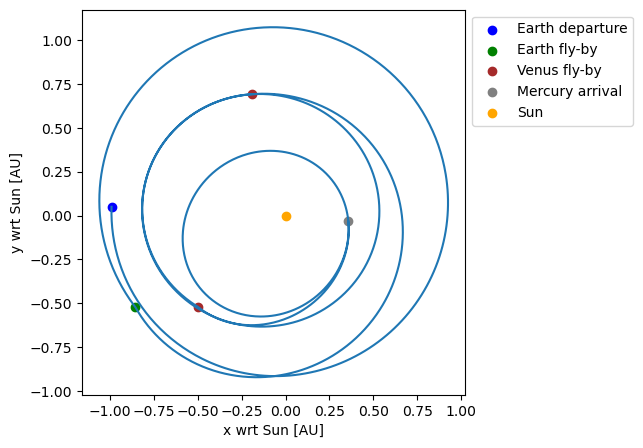

In [16]:
# Extract the state history
state_history = transfer_trajectory_object.states_along_trajectory(500)
fly_by_states = np.array([state_history[node_times[i]] for i in range(len(node_times))])
state_history = result2array(state_history)
au = 1.5e11

# Plot the state history
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(state_history[:, 1] / au, state_history[:, 2] / au)
ax.scatter(fly_by_states[0, 0] / au, fly_by_states[0, 1] / au, color='blue', label='Earth departure')
ax.scatter(fly_by_states[1, 0] / au, fly_by_states[1, 1] / au, color='green', label='Earth fly-by')
ax.scatter(fly_by_states[2, 0] / au, fly_by_states[2, 1] / au, color='brown', label='Venus fly-by')
ax.scatter(fly_by_states[3, 0] / au, fly_by_states[3, 1] / au, color='brown')
ax.scatter(fly_by_states[4, 0] / au, fly_by_states[4, 1] / au, color='grey', label='Mercury arrival')
ax.scatter([0], [0], color='orange', label='Sun')
ax.set_xlabel('x wrt Sun [AU]')
ax.set_ylabel('y wrt Sun [AU]')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=[1, 1])
plt.show()

## MGA transfer with hodographic-shaping legs

This final example shows how to setup a low-thrust MGA transfer, with the thrust profile modeled using hodographic shaping. The approach is similar to the previous examples, with only some small differences when selecting the shaping functions.

### Setup and inputs
Again, a simplified system of bodies is used. A transfer between the Earth and Jupiter is considered, with gravity assists at Mars and the Earth. The transfer is considered to start at the edge of Earth's SOI and end at the edge of Jupiter's SOI.

In [17]:
# Create simplified bodies
bodies = environment_setup.create_simplified_system_of_bodies()
central_body = 'Sun'

# Define a new order of bodies (nodes)
transfer_body_order = ['Earth', 'Mars', 'Earth', "Jupiter"]

# Define the departure and insertion orbits
departure_semi_major_axis = np.inf
departure_eccentricity = 0.0

arrival_semi_major_axis = np.inf
arrival_eccentricity = 0.0

### Create transfer settings and transfer object

The creation of the transfer settings for a hodographic shaping leg requires, in particular, selecting the shaping functions. Each hodographic shaping leg is defined by a series of shaping functions, which determine the evolution of the velocity profile (in cylindrical coordinates) as a function of time throughout the transfer. Hence, it is necessary to select the terms constituting the shaping functions for the radial, normal, and axial velocity. Each shaping function has the form $\sum_i c_i \cdot f_i(t), \ i \geq 3$, with $c_i$ a constant and $f_i(t)$ a function of time (e.g. sine, cosine, exponential, power, etc.). In order to meet the boundary constraints, each shaping function requires a minimum of three terms; the coefficients of these terms (i.e. $c_1$, $c_2$, and $c_3$) are determined automatically. Additional shaping terms may be specified, which will further influence the evolution of the transfer; the coefficients of these terms (i.e. $c_i, \ i > 3$) are leg free parameters, and have to be specified by the user. 

If shaping functions with only three terms are specified, then each hodographic-shaping leg has only one parameter that needs to be specified by the user. The legs and nodes settings for such a transfer can be created using the `mga_settings_hodographic_shaping_legs_with_recommended_functions` factory function, which selects a set of recommended shaping functions.  

To select shaping function with terms other than the recommended ones or with more terms, the nodes and legs settings can be retrieved using the `mga_settings_hodographic_shaping_legs` factory function. This approach is followed here.

The first step is to select the number of revolutions and time of flight of each leg. Contrary to the previous examples, this parameters are specified before the creation of the transfer trajectory object because they are used when selecting the shaping functions. Next, one can select the shaping functions. The shaping functions used here were selected according to ([Gondelach, 2012](http://resolver.tudelft.nl/uuid:6a4f1673-88b1-4823-b2ef-9d864c84ab11), section 11.2), who finds these functions to offer the best performance for an Earth-Mars transfer. 

In [18]:
# Define number of revolutions of each leg
number_of_revolutions = [1, 0, 0]

# Define the departure date of the transfer
julian_day = constants.JULIAN_DAY
departure_date = 9558.896403441706 * julian_day

# Define the time of each leg
time_of_flight = np.array([904.9805697730939,
                           385.30358508711015,
                           1100.4278671415163]) * julian_day


# Create empty lists to save the shaping functions of each leg
radial_velocity_function_components_per_leg = []
normal_velocity_function_components_per_leg = []
axial_velocity_function_components_per_leg = []

# Loop over legs
for i in range(len(transfer_body_order)-1):
    # Compute frequency of the shaping term
    frequency = 2.0 * np.pi / time_of_flight[i]
    scale_factor = 1.0 / time_of_flight[i]

    # Radial velocity functions: recommended functions (3 terms), scaled power sine (1 term), scaled power cosine (1 term)
    radial_velocity_functions = shape_based_thrust.recommended_radial_hodograph_functions(time_of_flight[i])
    radial_velocity_functions.append(shape_based_thrust.hodograph_scaled_power_sine(
        exponent = 1.0,
        frequency = 0.5 * frequency,
        scale_factor = scale_factor))
    radial_velocity_functions.append(shape_based_thrust.hodograph_scaled_power_cosine(
        exponent = 1.0,
        frequency = 0.5 * frequency,
        scale_factor = scale_factor))

    # Normal velocity functions: recommended functions (3 terms), scaled power sine (1 term), scaled power cosine (1 term)
    normal_velocity_functions = shape_based_thrust.recommended_normal_hodograph_functions(time_of_flight[i])
    normal_velocity_functions.append(shape_based_thrust.hodograph_scaled_power_sine(
        exponent = 1.0,
        frequency = 0.5 * frequency,
        scale_factor = scale_factor))
    normal_velocity_functions.append(shape_based_thrust.hodograph_scaled_power_cosine(
        exponent = 1.0,
        frequency = 0.5 * frequency,
        scale_factor = scale_factor))

    # Axial velocity functions: recommended functions (3 terms), scaled power sine (1 term), scaled power cosine (1 term)
    axial_velocity_functions = shape_based_thrust.recommended_axial_hodograph_functions(time_of_flight[i], number_of_revolutions[i])
    exponent = 4.0
    axial_velocity_functions.append(shape_based_thrust.hodograph_scaled_power_cosine(
        exponent = exponent,
        frequency = (number_of_revolutions[i] + 0.5)*frequency,
        scale_factor = scale_factor ** exponent))
    axial_velocity_functions.append(shape_based_thrust.hodograph_scaled_power_sine(
        exponent = exponent,
        frequency = (number_of_revolutions[i] + 0.5)*frequency,
        scale_factor = scale_factor ** exponent))
    
    # Save lists with the shaping functions of the current leg
    radial_velocity_function_components_per_leg.append(radial_velocity_functions)
    normal_velocity_function_components_per_leg.append(normal_velocity_functions)
    axial_velocity_function_components_per_leg.append(axial_velocity_functions)

Having selected the shaping functions, it is now possible to create the legs and nodes settings and after that to create the transfer trajectory object.

In [19]:
# Get legs and nodes settings
transfer_leg_settings, transfer_node_settings = transfer_trajectory.mga_settings_hodographic_shaping_legs(
    transfer_body_order,
    radial_velocity_function_components_per_leg,
    normal_velocity_function_components_per_leg,
    axial_velocity_function_components_per_leg,
    departure_orbit = (departure_semi_major_axis, departure_eccentricity),
    arrival_orbit = (arrival_semi_major_axis, arrival_eccentricity) )

# Create the transfer calculation object
transfer_trajectory_object = transfer_trajectory.create_transfer_trajectory(
    bodies,
    transfer_leg_settings,
    transfer_node_settings,
    transfer_body_order,
    central_body)

### Define transfer parameters

As before, it is possible to print the definition of the transfer parameters which need to be selected.

In [20]:
# Print transfer parameter definitions
print("Transfer parameter definitions:")
transfer_trajectory.print_parameter_definitions(transfer_leg_settings, transfer_node_settings)

Transfer parameter definitions:
Parameter 0: Node time 0
Parameter 1: Node time 1
Parameter 2: Node time 2
Parameter 3: Node time 3
Parameter 4: Node 0 Outgoing excess velocity magnitude
Parameter 5: Node 0 Outgoing excess velocity in-plane angle
Parameter 6: Node 0 Outgoing excess velocity out-of-plane angle
Parameter 7: Node 1 Incoming excess velocity magnitude
Parameter 8: Node 1 Incoming excess velocity in-plane angle
Parameter 9: Node 1 Incoming excess velocity out-of-plane angle
Parameter 10: Node 1 Swingby periapsis
Parameter 11: Node 1 Swingby orbital plane angle (with respect to the incoming velocity and node velocity)
Parameter 12: Node 1 Swingby Delta V
Parameter 13: Node 2 Incoming excess velocity magnitude
Parameter 14: Node 2 Incoming excess velocity in-plane angle
Parameter 15: Node 2 Incoming excess velocity out-of-plane angle
Parameter 16: Node 2 Swingby periapsis
Parameter 17: Node 2 Swingby orbital plane angle (with respect to the incoming velocity and node velocity)

In this case, there is a much larger list of free parameters than in the previous cases. As before, the first parameters are the node times, corresponding to the times when the spacecraft encounters each planet. Next, the node free parameters are required. These include the selection of the departure velocity at the departure node (3 parameters), the arrival velocity at each swingby node (3 parameters per node), the characteristics of each swingby (3 parameters per node), and the arrival velocity at the arrival node (3 parameters). Finally, it is necessary to specify the leg free parameters. These consist of the number of revolutions of each leg (1 parameter per leg), and of two free coefficients per velocity component per leg (6 parameters per leg).

The parameters used in this example were determined via optimization, using PyGMO. The code used to optimize the transfer is analyzed in [this example](hodographic_shaping_mga_optimization.ipynb).

In [21]:
# Define times at each node
node_times = list()
node_times.append( departure_date )
for i, tof in enumerate(time_of_flight):
    node_times.append( node_times[i] + tof )

# Define free parameters per leg
leg_free_parameters = list()
leg_free_parameters.append([number_of_revolutions[0], -804.0, 5232.0, -3612.0, -6300.0, -299.0, -1731.0])
leg_free_parameters.append([number_of_revolutions[1], -2587.0, -6648.0, 6984.0, 3438.0, -3043.0, -1027.0])
leg_free_parameters.append([number_of_revolutions[2], -8283.0, -8114.0, -2667.0, 7128.0, 2473.0, -1471.0])

# Define free parameters per node
node_free_parameters = list()
node_free_parameters.append(np.zeros(3))
node_free_parameters.append([1183.979987813652, 0.0, 0.0, 10**5.565627663196208, 0.0, 0.0])
node_free_parameters.append([3074.131807921915, 0.0, 0.0, 10**8.129202206701256, 0.0, 0.0])
node_free_parameters.append(np.zeros(3))

### Evaluate transfer
Having selected the transfer parameters, it is now possible to evaluate the transfer.

In [22]:
# Evaluate the transfer with the given parameters
transfer_trajectory_object.evaluate( node_times, leg_free_parameters, node_free_parameters)

### Extract results and plot trajectory
Finally, the results are extracted and used to analyze the transfer trajectory. 

#### Print results
Again, the values for the $\Delta V$ and time of flight can be retrieved.

In [23]:
# Print the total DeltaV and time of Flight required for the MGA
print('Total Delta V of %.3f m/s and total Time of flight of %.3f days\n' % \
    (transfer_trajectory_object.delta_v, transfer_trajectory_object.time_of_flight / julian_day))

# Print the DeltaV required during each leg
print('Delta V per leg: ')
for i in range(len(transfer_body_order)-1):
    print(" - between %s and %s: %.3f m/s" % \
        (transfer_body_order[i], transfer_body_order[i+1], transfer_trajectory_object.delta_v_per_leg[i]))
print()

# Print the DeltaV required at each node
print('Delta V per node : ')
for i in range(len(transfer_body_order)):
    print(" - at %s: %.3f m/s" % \
        (transfer_body_order[i], transfer_trajectory_object.delta_v_per_node[i]))

Total Delta V of 48868.170 m/s and total Time of flight of 2390.712 days

Delta V per leg: 
 - between Earth and Mars: 10165.234 m/s
 - between Mars and Earth: 7166.814 m/s
 - between Earth and Jupiter: 31536.122 m/s

Delta V per node : 
 - at Earth: 0.000 m/s
 - at Mars: 0.000 m/s
 - at Earth: 0.000 m/s
 - at Jupiter: 0.000 m/s


#### Plot the transfer
Similarly to the previous cases, the state history throughout the transfer can be retrieved with `states_along_trajectory`. Furthermore, it is possible to retrieve the thrust acceleration history with respect to different reference frames (inertial, TNW, and RSW). Below, the thrust acceleration is retrieved with respect to a TNW frame (through `tnw_thrust_accelerations_along_trajectory`) and plotted.

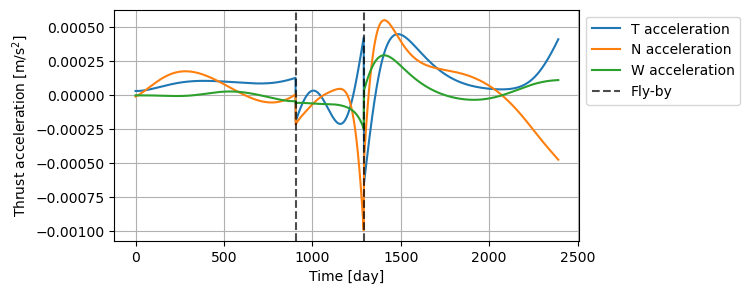

In [24]:
# Extract state and thrust acceleration history
# state_history = transfer_trajectory_object.states_along_trajectory(500)
thrust_acceleration_tnw_history = transfer_trajectory_object.tnw_thrust_accelerations_along_trajectory(500)

thrust_acceleration_tnw_history = result2array(thrust_acceleration_tnw_history)

# Plot thrust acceleration
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
initial_time = thrust_acceleration_tnw_history[0, 0]
time_of_flight = thrust_acceleration_tnw_history[:, 0] - initial_time
ax.plot(time_of_flight / julian_day, thrust_acceleration_tnw_history[:, 1], label="T acceleration" )
ax.plot(time_of_flight / julian_day, thrust_acceleration_tnw_history[:, 2], label="N acceleration" )
ax.plot(time_of_flight / julian_day, thrust_acceleration_tnw_history[:, 3], label="W acceleration" )
ax.axvline((node_times[1] - initial_time) / julian_day, ls="--", c="k", alpha=0.7, label="Fly-by")
ax.axvline((node_times[2] - initial_time) / julian_day, ls="--", c="k", alpha=0.7, label=None)
ax.set_xlabel('Time [day]')
ax.set_ylabel('Thrust acceleration [m/s$^2$]')
ax.grid()
ax.set_axisbelow(True)
ax.legend(bbox_to_anchor=[1, 1])
plt.show()